In [6]:
import back_test
import numpy as np
import pandas as pd
import seaborn as sb

In [9]:
DATA_PATH = "./data/"
dat = pd.read_parquet(DATA_PATH + "eurusd.parquet")
dat.shape, dat.columns

((661062, 3), Index(['time', 'close', 'volume'], dtype='object'))

In [71]:
opt_trades = {}
dd_constraints = np.arange(10,100,20) # TODO: change
for dd_bps in dd_constraints:
    opt_trades[dd_bps] = back_test.target_optimal(df_price = dat.close,
                                                  fee_bps = 3,
                                                  dd_bps = dd_bps)
    
    print(f"Done optimizing labels with dd_bps constraint = {dd_bps}.")

Done optimizing labels with dd_bps constraint = 10.
Done optimizing labels with dd_bps constraint = 30.
Done optimizing labels with dd_bps constraint = 50.
Done optimizing labels with dd_bps constraint = 70.
Done optimizing labels with dd_bps constraint = 90.


In [72]:
stats = {} # trading statistics
for dd_bps in dd_constraints:
    trades_in = dat.copy()
    trades_in['S'] = 0
    trades_in['L'] = 0
    trades_in['C'] = 0
    trades_in.loc[opt_trades[dd_bps] == 0, 'S'] = 1
    trades_in.loc[opt_trades[dd_bps] == 1, 'L'] = 1
    trades_in.loc[opt_trades[dd_bps] == 2, 'C'] = 1

    stats[dd_bps] = back_test.trade_stats(trades_in)

In [70]:
importlib.reload(back_test)

<module 'back_test' from '/Users/rebrahimi/projects/optimal-trades/back_test.py'>

In [73]:
stats[10]

{'annual_return': 4.822,
 'sharpe': 51.26,
 'sortino': 135.23,
 'std_deviation': 0.094,
 'total_return': 85.135,
 'trade_count_long': 16005,
 'trade_count_short': 16158,
 'trade_count_total': 32163,
 'average_return_long': 7.0,
 'average_return_short': 7.0,
 'accuracy_long': 0.985,
 'accuracy_short': 1.0,
 'accuracy_total': 0.993,
 'max_drawdown': -0.006700000000002149,
 'max_drawdown_days': 0}

<AxesSubplot:xlabel='dd_bps', ylabel='annual_return'>

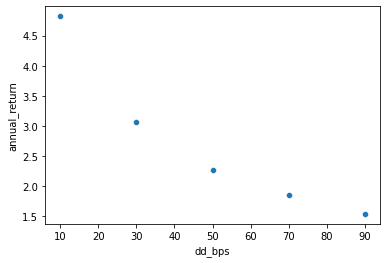

In [74]:
df_stats = pd.DataFrame.from_dict(stats, orient = 'index')
df_stats['dd_bps'] = df_stats.index
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'annual_return')

<AxesSubplot:xlabel='dd_bps', ylabel='sortino'>

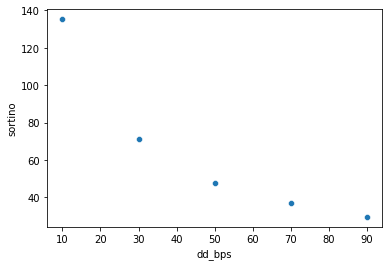

In [75]:
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'sortino')

<AxesSubplot:xlabel='dd_bps', ylabel='trade_count_total'>

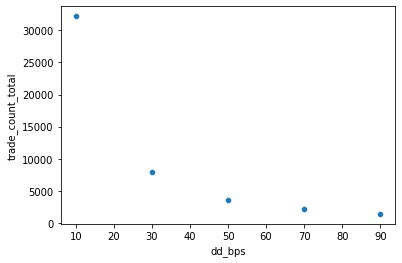

In [76]:
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'trade_count_total')

Separate code for model development and optimization.